desc

Reading dataset

In [78]:
import pandas as pd

In [79]:
df=pd.readcd _csv("case study.csv")
df.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,"2,605"
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,"1,480"


In [80]:
df.shape

(333405, 7)

In [81]:
333405-8-3524

329873

**finding missing values**


In [82]:
df.isnull().sum()

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             8
dtype: int64

In [83]:
missing_count = df['UNIT PRICE'].isnull().sum()
print(f"missing row values:{missing_count}")

missing row values:8


In [84]:
df_cleaned = df.dropna(subset=['UNIT PRICE'])

In [85]:
missing_unit_price_count = df_cleaned['UNIT PRICE'].isnull().sum()
print(f"Remaining missing values in 'UNIT PRICE': {missing_unit_price_count}")

Remaining missing values in 'UNIT PRICE': 0


In [86]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333397 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 333397 non-null  object
 1   ANONYMIZED CATEGORY  333397 non-null  object
 2   ANONYMIZED PRODUCT   333397 non-null  object
 3   ANONYMIZED BUSINESS  333397 non-null  object
 4   ANONYMIZED LOCATION  333397 non-null  object
 5   QUANTITY             333397 non-null  int64 
 6   UNIT PRICE           333397 non-null  object
dtypes: int64(1), object(6)
memory usage: 20.3+ MB


In [87]:
duplicate_values = df.duplicated()
print(f"dublicate value are:{duplicate_values}")

dublicate value are:0         False
1         False
2         False
3         False
4         False
          ...  
333400     True
333401    False
333402    False
333403    False
333404    False
Length: 333405, dtype: bool


In [88]:
dublicate_count = len(df[df.duplicated()])
print(f"number of dublicate rows:{dublicate_count}")

number of dublicate rows:3524


In [89]:
df_cleaned = df.drop_duplicates()

In [90]:
new_duplicates_count = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows after cleaning: {new_duplicates_count}")

Number of duplicate rows after cleaning: 0


In [91]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329881 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 329881 non-null  object
 1   ANONYMIZED CATEGORY  329881 non-null  object
 2   ANONYMIZED PRODUCT   329881 non-null  object
 3   ANONYMIZED BUSINESS  329881 non-null  object
 4   ANONYMIZED LOCATION  329881 non-null  object
 5   QUANTITY             329881 non-null  int64 
 6   UNIT PRICE           329873 non-null  object
dtypes: int64(1), object(6)
memory usage: 20.1+ MB


In [92]:
df['DATE'] = pd.to_datetime(df['DATE'])

C:\Users\Masudi\AppData\Local\Temp\ipykernel_2920\2541906660.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'])


In [93]:
# Convert 'DATE' column to datetime if it's not already
df_cleaned['DATE'] = pd.to_datetime(df_cleaned['DATE'])

# Now you can add the 'month-year' column
df_cleaned['month-year'] = df_cleaned['DATE'].dt.month_name() + ', ' + df_cleaned['DATE'].dt.year.astype(str)


C:\Users\Masudi\AppData\Local\Temp\ipykernel_2920\3472946328.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['DATE'] = pd.to_datetime(df_cleaned['DATE'])
C:\Users\Masudi\AppData\Local\Temp\ipykernel_2920\3472946328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DATE'] = pd.to_datetime(df_cleaned['DATE'])
C:\Users\Masudi\AppData\Local\Temp\ipykernel_2920\3472946328.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [94]:
df_cleaned.head(2)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,month-year
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850,"August, 2024"
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910","August, 2024"


In [96]:
df_cleaned.shape

(329881, 8)

In [98]:
categorized_sales = df.groupby('ANONYMIZED CATEGORY').agg({'QUANTITY':'sum','UNIT PRICE':'sum'})

: 

In [ ]:
categorized_sales.head()

: 

In [101]:
bussiness_sales = df.groupby('ANONYMIZED BUSINESS').agg({'QUANTITY':'sum','UNIT PRICE':'sum'})

In [1]:
bussiness_sales.head()

NameError: name 'bussiness_sales' is not defined

In [102]:
df['UNIT PRICE'] = df['UNIT PRICE'].str.replace(',','').astype(float)

: 

In [105]:
import numpy as new_duplicates_count

In [106]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:
import matplotlib.pyplot as plt

In [108]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
import seaborn as sns

C:\Users\Masudi\AppData\Local\Temp\ipykernel_2920\2859042554.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=categorized_sales, x='ANONYMIZED CATEGORY', y='QUANTITY', palette='viridis')


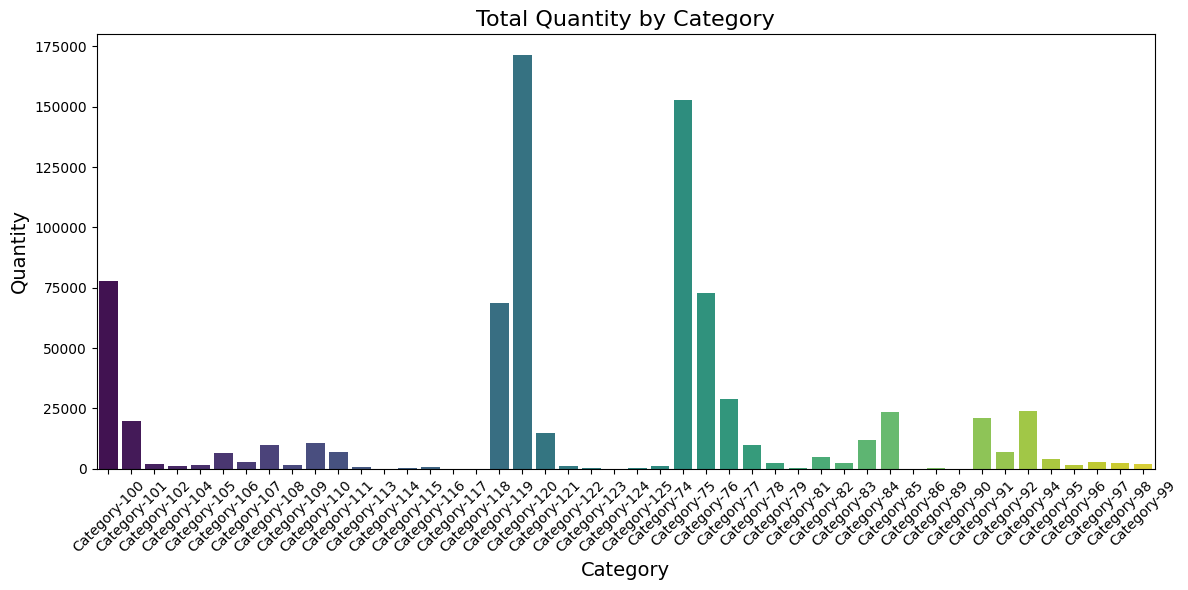

In [111]:
plt.figure(figsize=(12, 6))
sns.barplot(data=categorized_sales, x='ANONYMIZED CATEGORY', y='QUANTITY', palette='viridis')
plt.title('Total Quantity by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=categorized_sales, x='ANONYMIZED CATEGORY', y='UNIT PRICE', palette='muted')
plt.title('Total Value by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('UNIT PRICE', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Masudi\AppData\Local\Temp\ipykernel_2920\1093782817.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=categorized_sales, x='ANONYMIZED CATEGORY', y='UNIT PRICE', palette='muted')
C:\Users\Masudi\AppData\Local\Temp\ipykernel_2920\1093782817.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


C:\Users\Masudi\AppData\Local\Temp\ipykernel_2920\2240262531.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_business_quantity, x='ANONYMIZED BUSINESS', y='QUANTITY', palette='coolwarm')


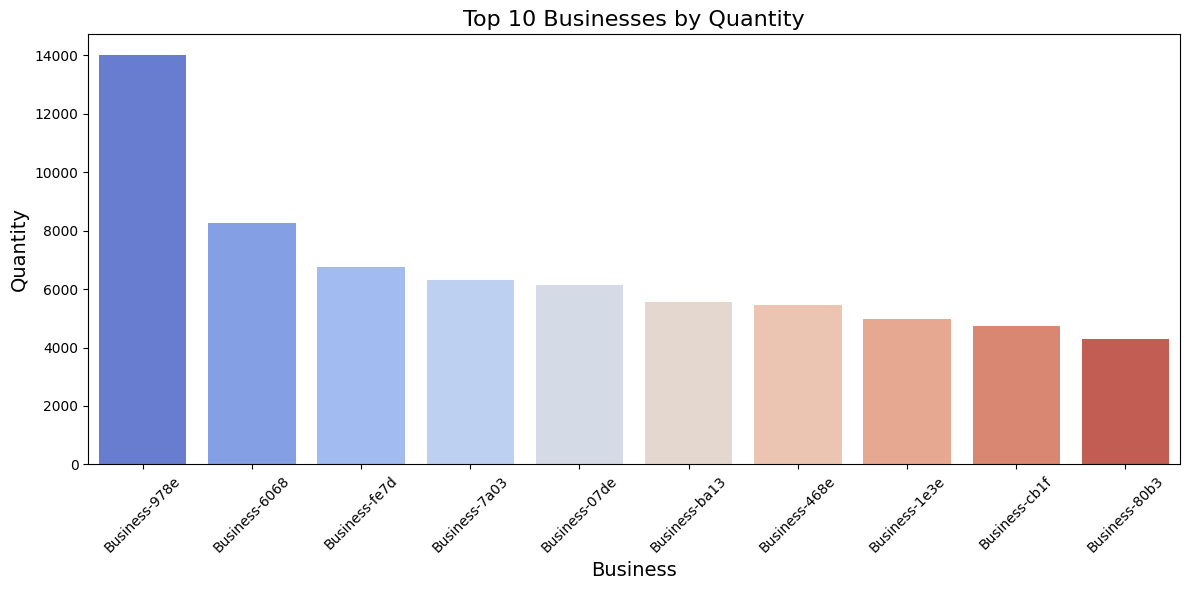

In [ ]:
top_business_quantity = bussiness_sales.nlargest(10, 'QUANTITY')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_business_quantity, x='ANONYMIZED BUSINESS', y='QUANTITY', palette='coolwarm')
plt.title('Top 10 Businesses by Quantity', fontsize=16)
plt.xlabel('Business', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Masudi\AppData\Local\Temp\ipykernel_2920\1876773582.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_business_value, x='ANONYMIZED BUSINESS', y='UNIT PRICE', palette='coolwarm')


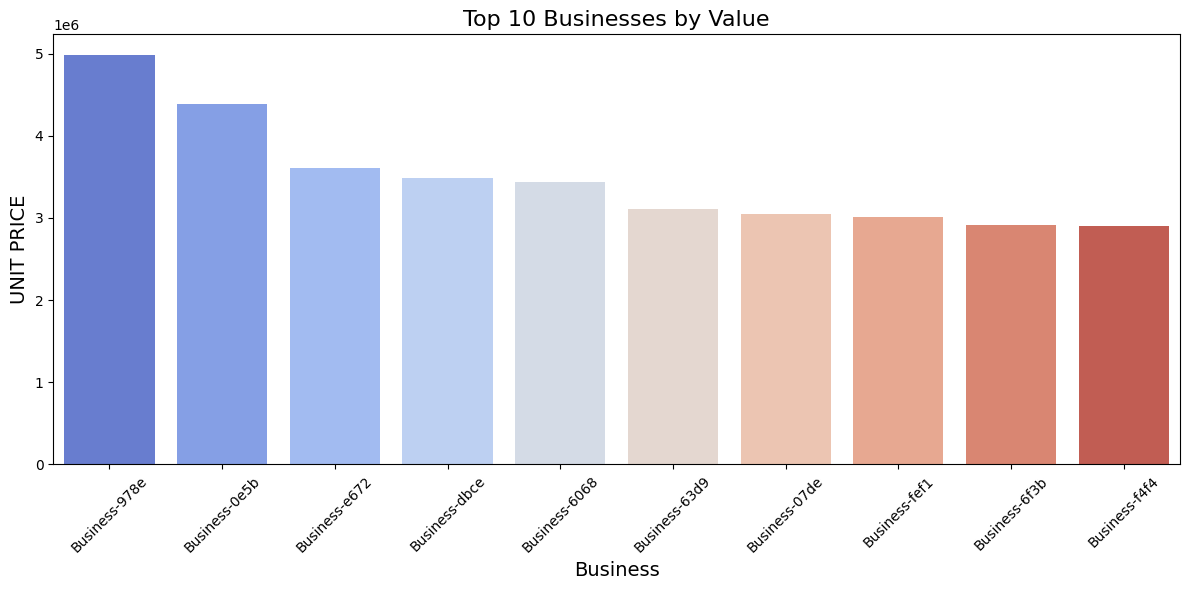

In [ ]:
top_business_value = bussiness_sales.nlargest(10, 'UNIT PRICE')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_business_value, x='ANONYMIZED BUSINESS', y='UNIT PRICE', palette='coolwarm')
plt.title('Top 10 Businesses by Value', fontsize=16)
plt.xlabel('Business', fontsize=14)
plt.ylabel('UNIT PRICE', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [68]:
df_cleaned

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,"2,605"
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,"1,480"
...,...,...,...,...,...,...,...
333398,"November 13, 2024, 1:59 PM",Category-121,Product-898d,Business-0e99,Location-689f,5,"1,360"
333401,"August 20, 2024, 8:24 PM",Category-106,Product-21f4,Business-72bc,Location-689f,1,850
333402,"August 20, 2024, 8:24 PM",Category-76,Product-6e9c,Business-72bc,Location-689f,1,"2,575"
333403,"October 10, 2024, 6:19 PM",Category-91,Product-523e,Business-2693,Location-b27b,1,"1,520"


In [70]:
sales_trends = df_cleaned.groupby('DATE').agg({'QUANTITY': 'sum', 'UNIT PRICE': 'sum'})

In [71]:
sales_trends

,QUANTITY,UNIT PRICE
DATE,,
"April 1, 2024, 10:07 PM",5,"4,0001,345"
"April 1, 2024, 10:23 PM",5,"5605602,4901,445"
"April 1, 2024, 10:27 PM",40,"1,870"
"April 1, 2024, 10:28 PM",5,"4,000"
"April 1, 2024, 10:35 PM",65,"2,0104,0001,9801,4801,510"
...,...,...
"September 9, 2024, 9:51 PM",22,"3,9501,2651,7751,7501,1602,4902,5401,945685700..."
"September 9, 2024, 9:52 PM",37,"2,5507101,825"
"September 9, 2024, 9:54 PM",5,"2,5402,5401,160"


In [ ]:
# Group data by 'Month-Year' for sales trends
sales_trends = df_cleaned.groupby('Month-Year').agg({'QUANTITY': 'sum', 'Value': 'sum'})

# Sort the 'Month-Year' column to ensure chronological order
sales_trends['Month-Year'] = pd.to_datetime(sales_trends['Month-Year'], format='%B %Y')
sales_trends = sales_trends.sort_values(by='Month-Year')

# Plotting the sales trends (Quantity and Value) over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_trends, x='Month-Year', y='QUANTITY', marker='o', label='Quantity', color='blue')
sns.lineplot(data=sales_trends, x='Month-Year', y='Value', marker='o', label='Value', color='green')
plt.title('Sales Trends Over Time', fontsize=16)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Sales (Quantity & Value)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()
